In [147]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [148]:
raw_data = pd.read_csv('./mushrooms.csv')

In [149]:
raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [150]:
raw_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [151]:
raw_data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [152]:
target = raw_data['class']

<AxesSubplot:>

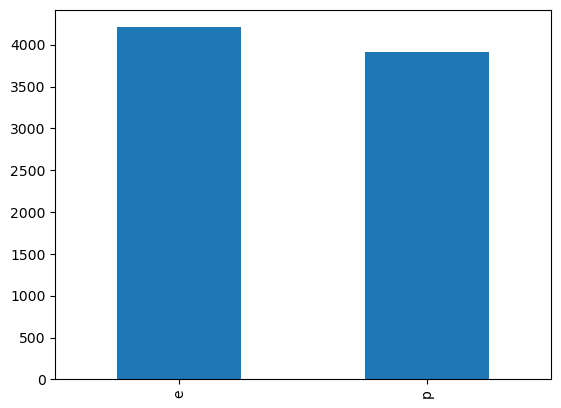

In [153]:
target.value_counts().plot(kind='bar')

In [154]:
features = raw_data.drop(['class', 'veil-type'], axis=1)

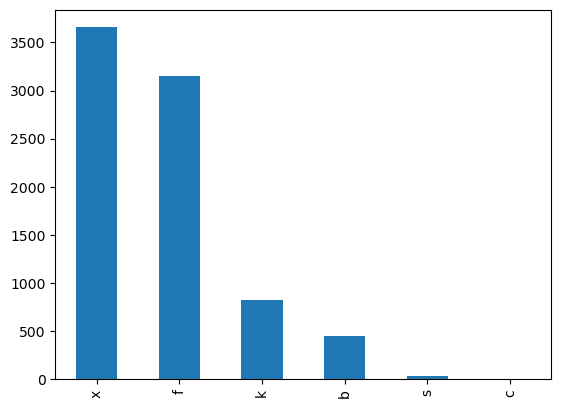

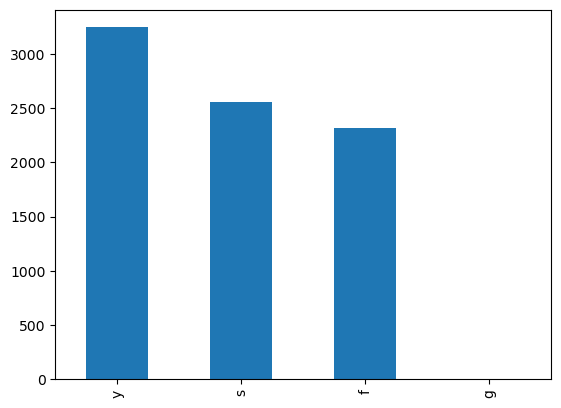

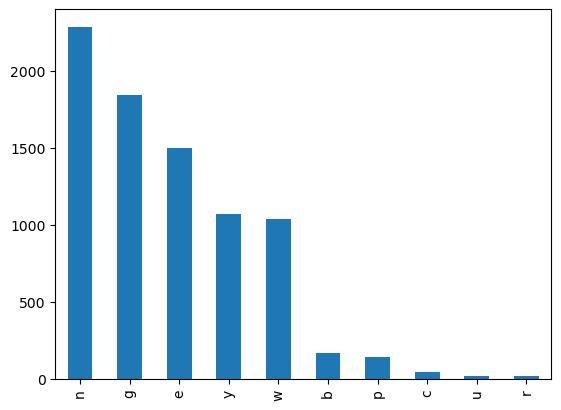

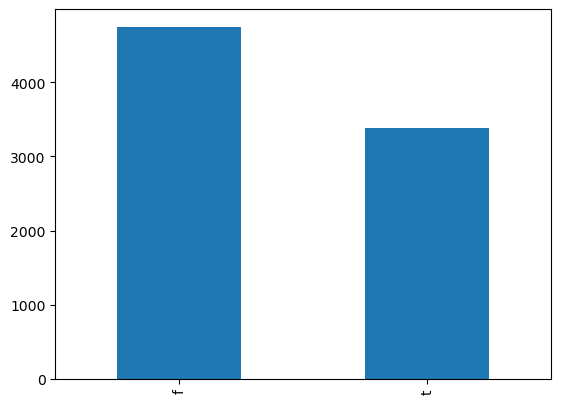

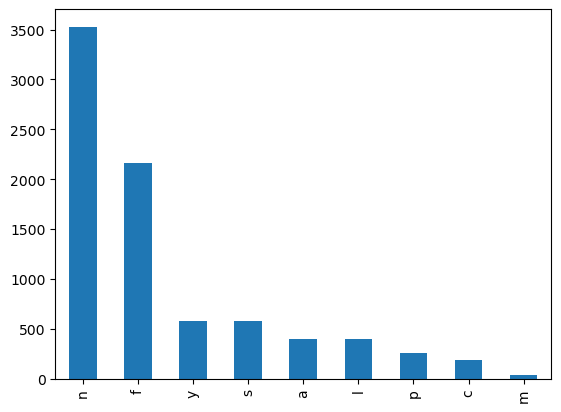

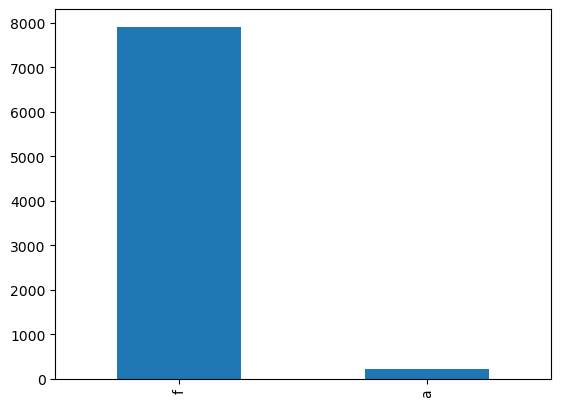

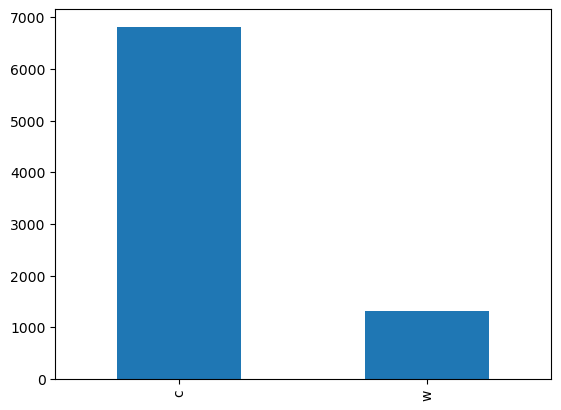

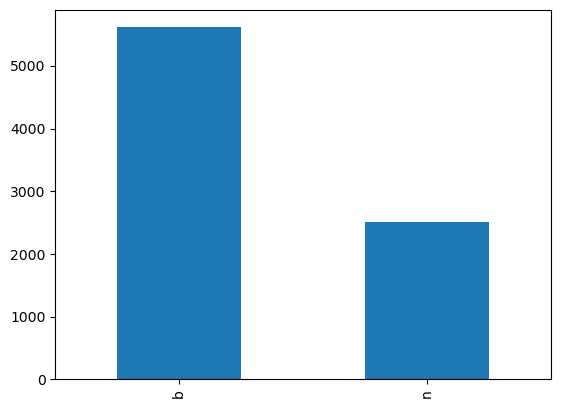

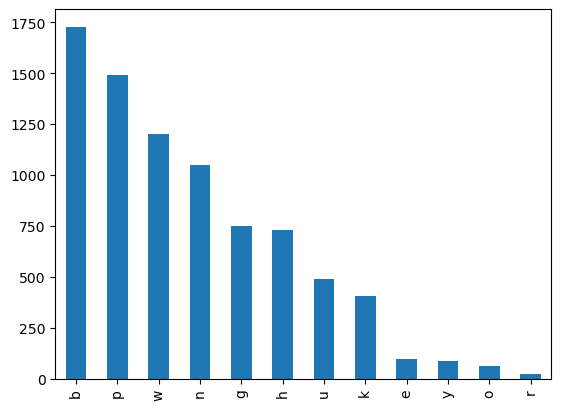

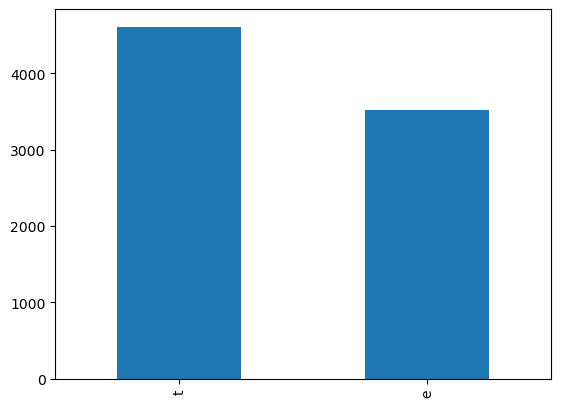

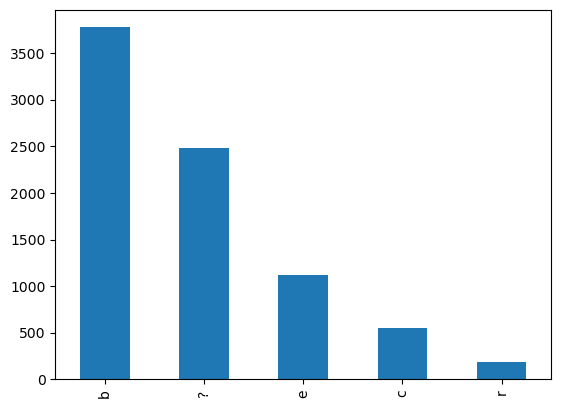

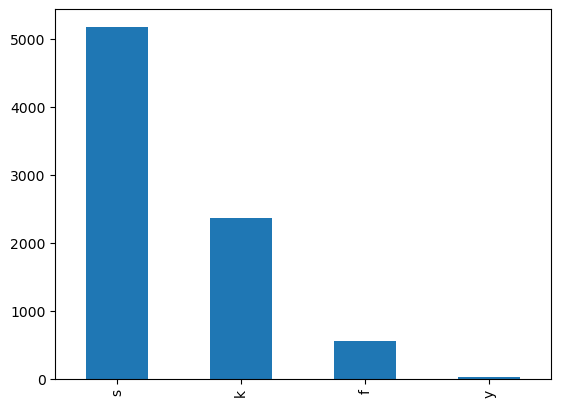

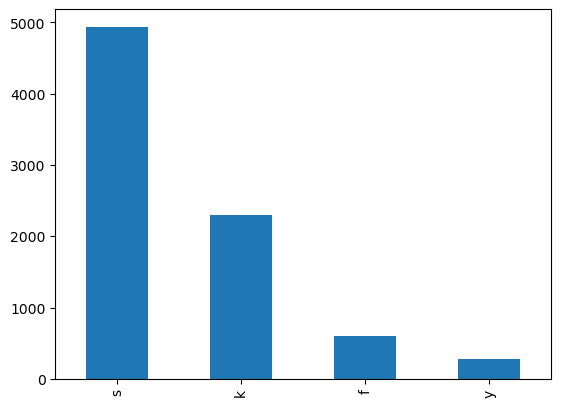

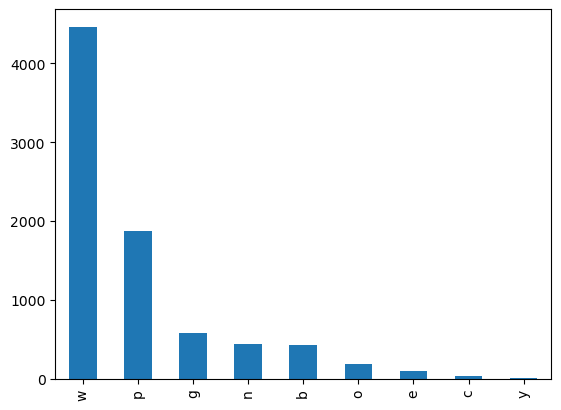

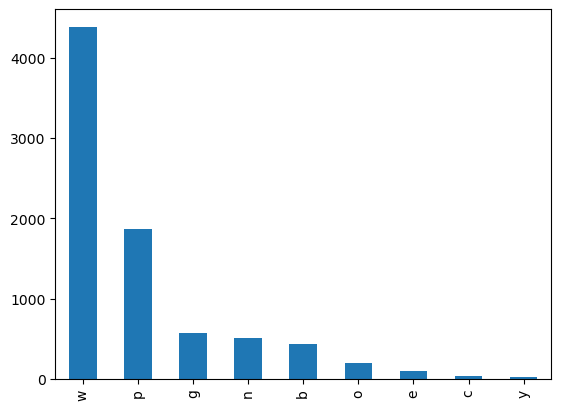

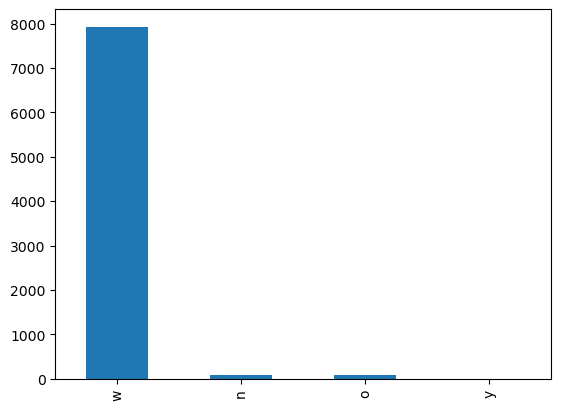

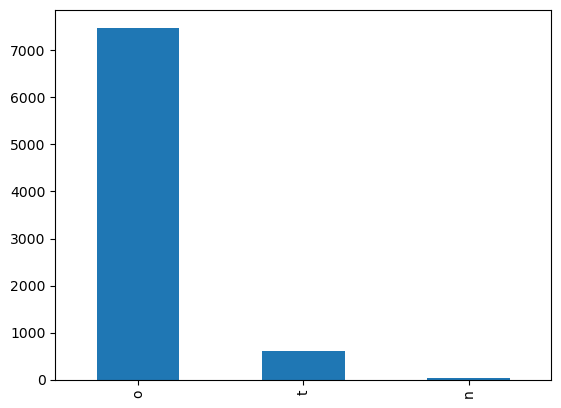

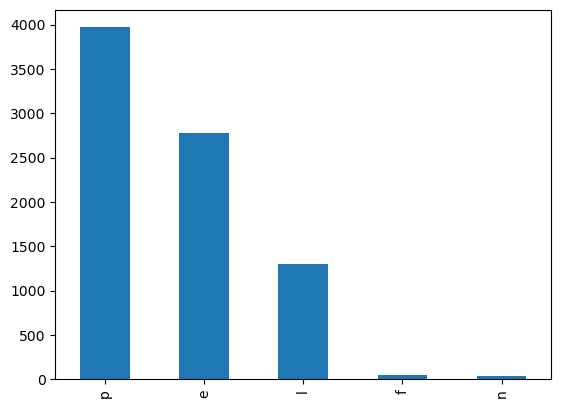

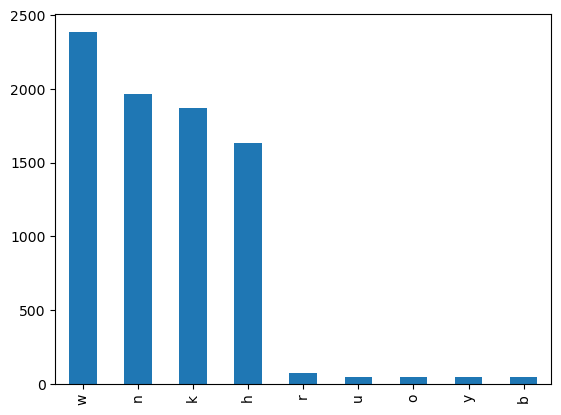

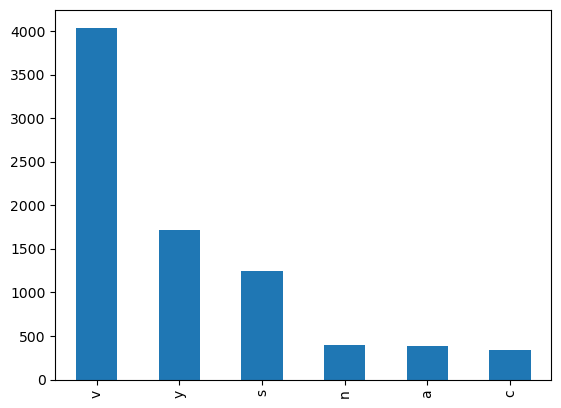

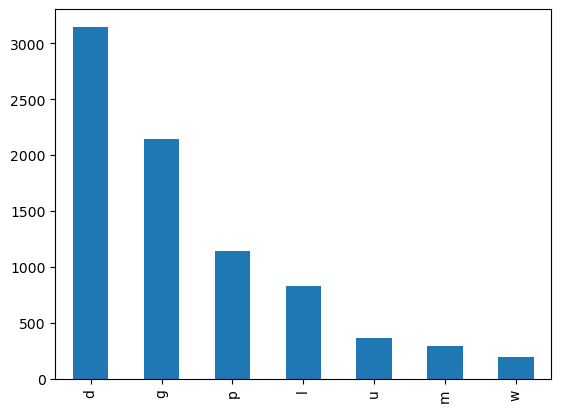

In [155]:
for col in features.columns:
    features[col].value_counts().plot(kind='bar')
    plt.show()

In [156]:
label_encoder = LabelEncoder()

In [157]:
encoded_targert = label_encoder.fit_transform(target)

In [158]:
for col in features.columns:
    features[col] = labe_encoder.fit_transform(features[col])

In [159]:
features.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [160]:
scaler = MinMaxScaler()

In [161]:
for col in features.columns:
    features[col] = scaler.fit_transform(features[[col]])

In [162]:
features.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.669621,0.609224,0.500520,0.415559,0.518095,0.974151,0.161497,0.309207,0.437335,0.567208,...,0.525029,0.534548,0.727043,0.724335,0.655178,0.534712,0.572994,0.449594,0.728804,0.251436
std,0.320866,0.409958,0.282869,0.492848,0.262966,0.158695,0.368011,0.462195,0.321851,0.495493,...,0.207153,0.225325,0.237718,0.238411,0.080890,0.135532,0.450418,0.297833,0.250416,0.286663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.333333,0.000000,0.250000,1.000000,0.000000,0.000000,0.181818,0.000000,...,0.333333,0.333333,0.750000,0.750000,0.666667,0.500000,0.000000,0.250000,0.600000,0.000000
50%,0.600000,0.666667,0.444444,0.000000,0.625000,1.000000,0.000000,0.000000,0.454545,1.000000,...,0.666667,0.666667,0.875000,0.875000,0.666667,0.500000,0.500000,0.375000,0.800000,0.166667
75%,1.000000,1.000000,0.888889,1.000000,0.625000,1.000000,0.000000,1.000000,0.636364,1.000000,...,0.666667,0.666667,0.875000,0.875000,0.666667,0.500000,1.000000,0.875000,0.800000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [169]:
X_train, X_test, y_train, y_test = train_test_split(features, encoded_targert, test_size=0.2)

In [170]:
model = LogisticRegression()

In [171]:
model.fit(X_train, y_train) 

LogisticRegression()

In [172]:
predictions = model.predict(X_test)

In [173]:
accuracy_score(y_test, predictions)

0.9532307692307692

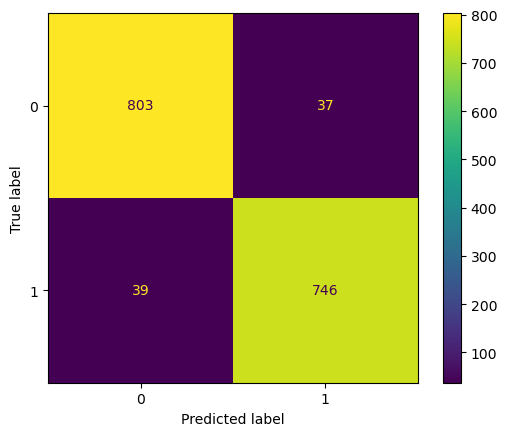

In [174]:
conf_matrix = confusion_matrix(y_test, predictions)
display = ConfusionMatrixDisplay(conf_matrix)
display.plot()